In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
# Loading Libraries

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from termcolor import colored as cl

In [22]:
bos = pd.read_csv("/gdrive/MyDrive/BigDataStudy/boston.csv")  # load data sat

# data observation

In [23]:
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [24]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [25]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory Data Analysis

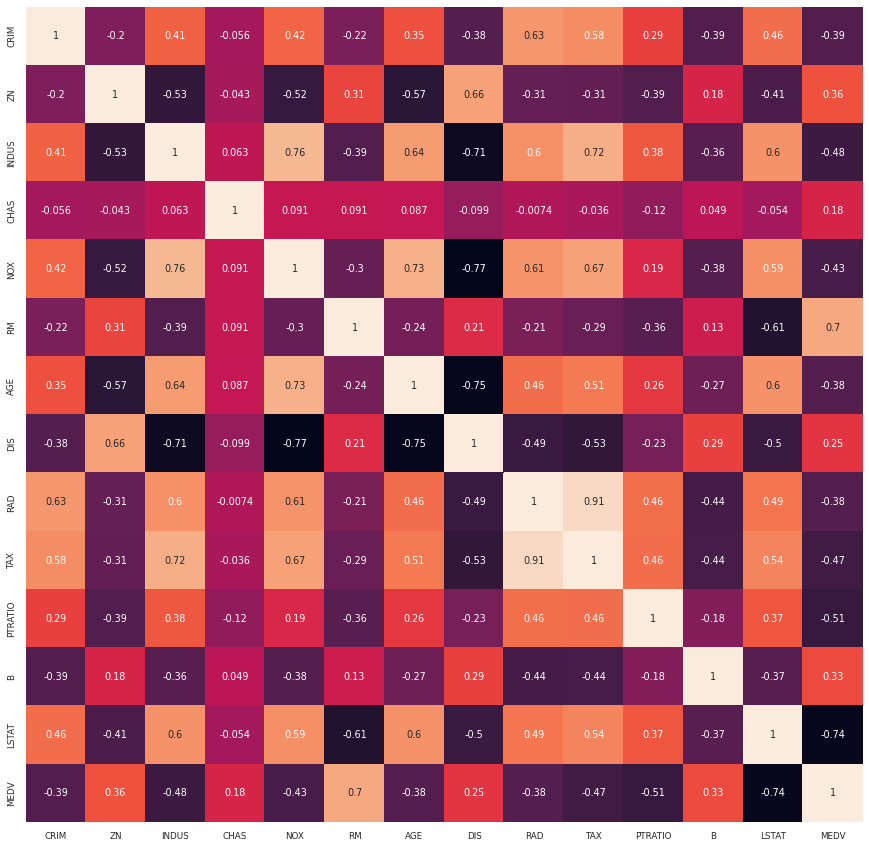

In [26]:
df_corr = bos.corr()
plt.figure(figsize=(15,15))
sb.set(font_scale = 0.8)
sb.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [27]:
bos.drop(['CRIM','ZN','CHAS','DIS','B','AGE','RAD'], axis=1, inplace=True)  # drop under 0.4

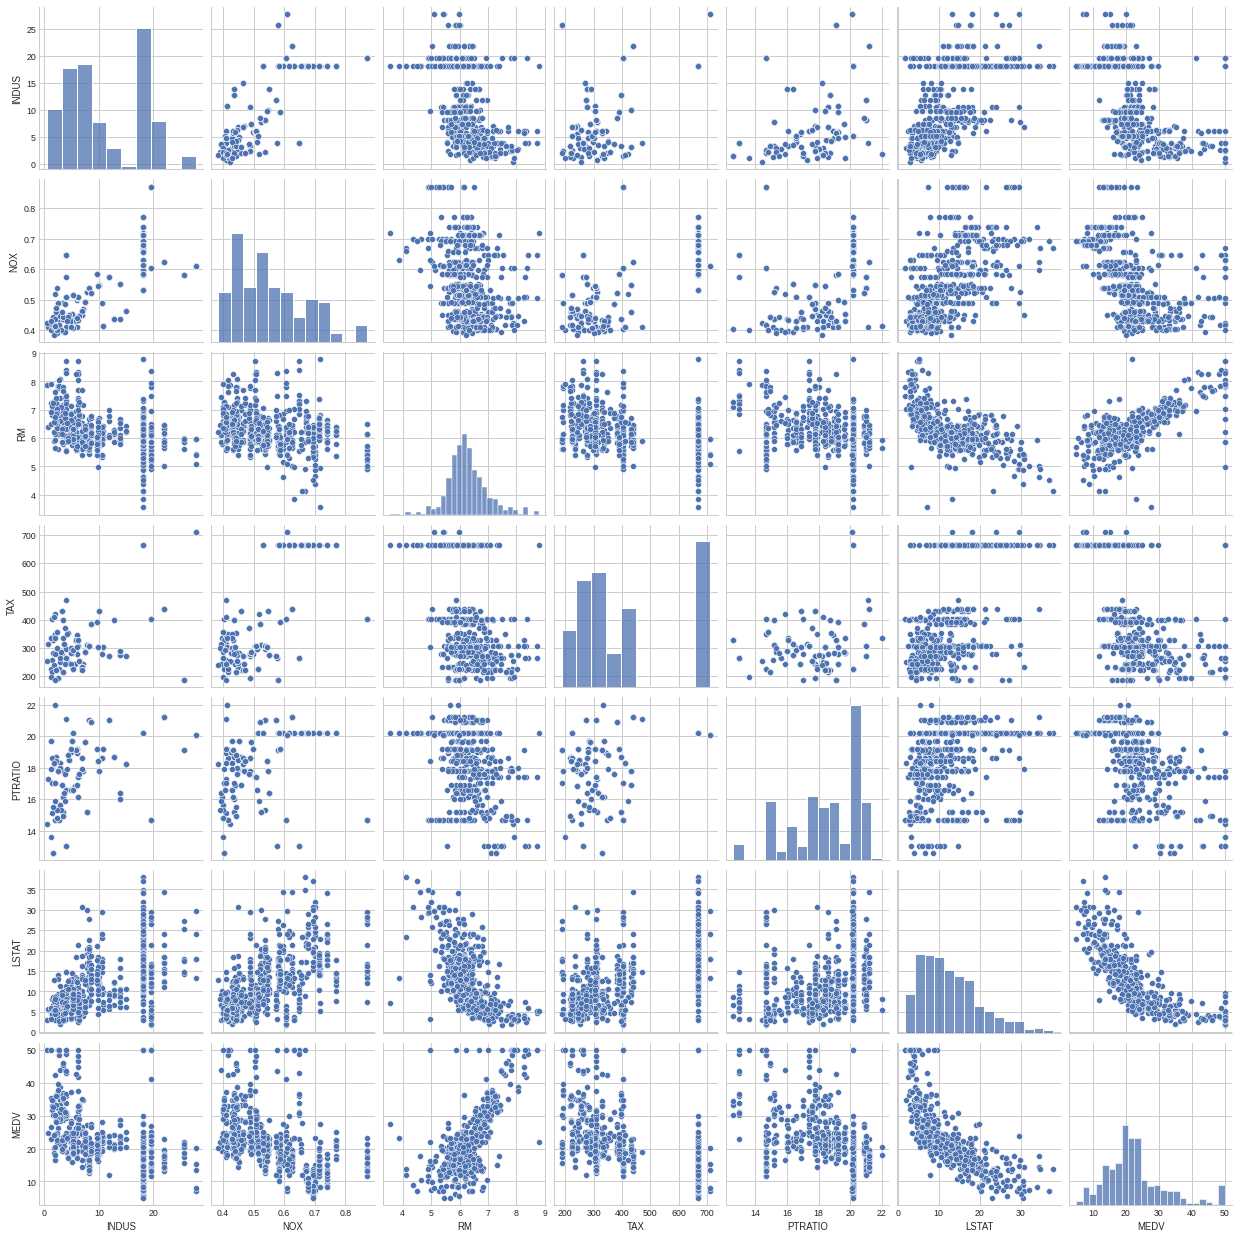

In [28]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

sb.pairplot(bos)
plt.savefig('pairplor.png')

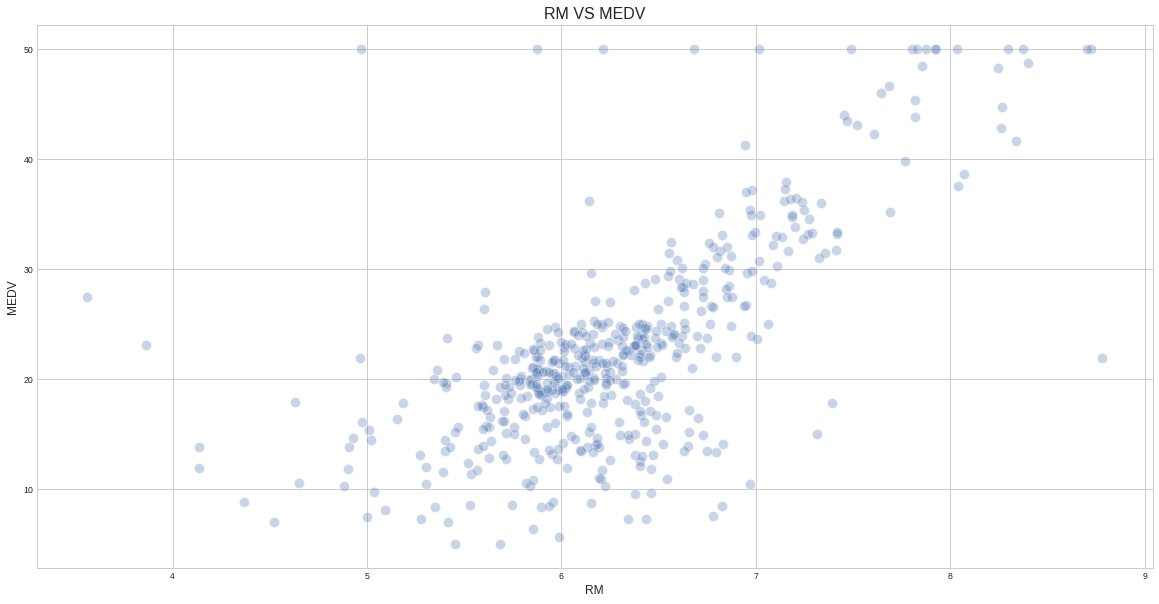

In [29]:
plt.scatter(x = 'RM', y = 'MEDV',
            data = bos, s =100, alpha = 0.3, edgecolor = 'white')
plt.title('RM VS MEDV', fontsize =16)
plt.ylabel('MEDV', fontsize =12)
plt.xlabel('RM', fontsize = 12)
plt.savefig('rm_medv.png')

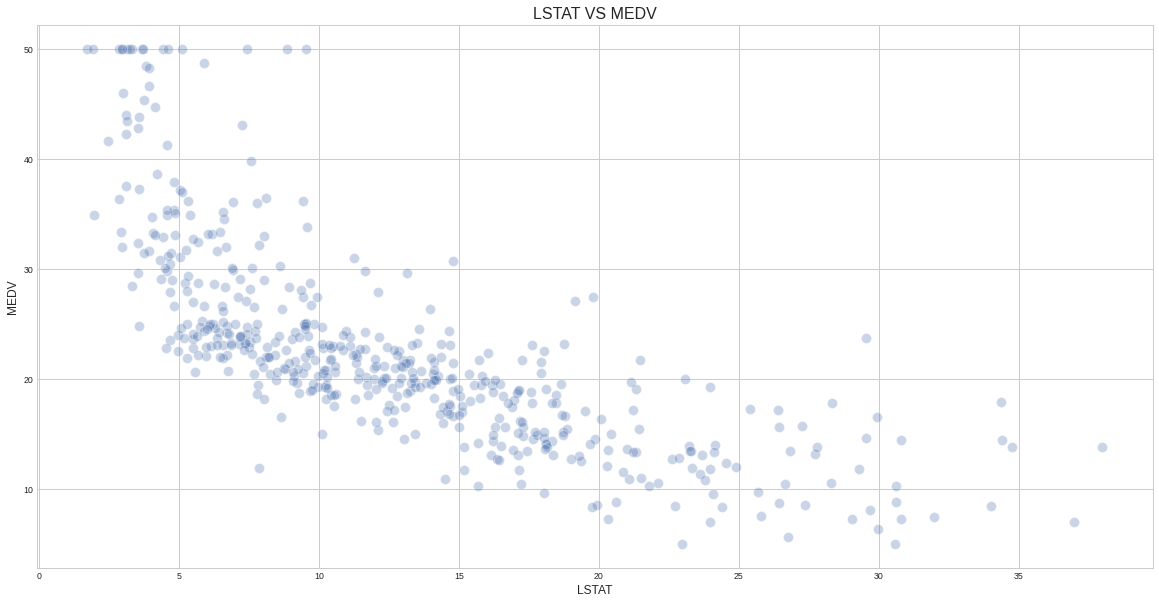

In [30]:
plt.scatter(x = 'LSTAT', y = 'MEDV',
            data = bos, s =100, alpha = 0.3, edgecolor = 'white')
plt.title('LSTAT VS MEDV', fontsize =16)
plt.ylabel('MEDV', fontsize =12)
plt.xlabel('LSTAT', fontsize = 12)
plt.savefig('lstat_medv.png')

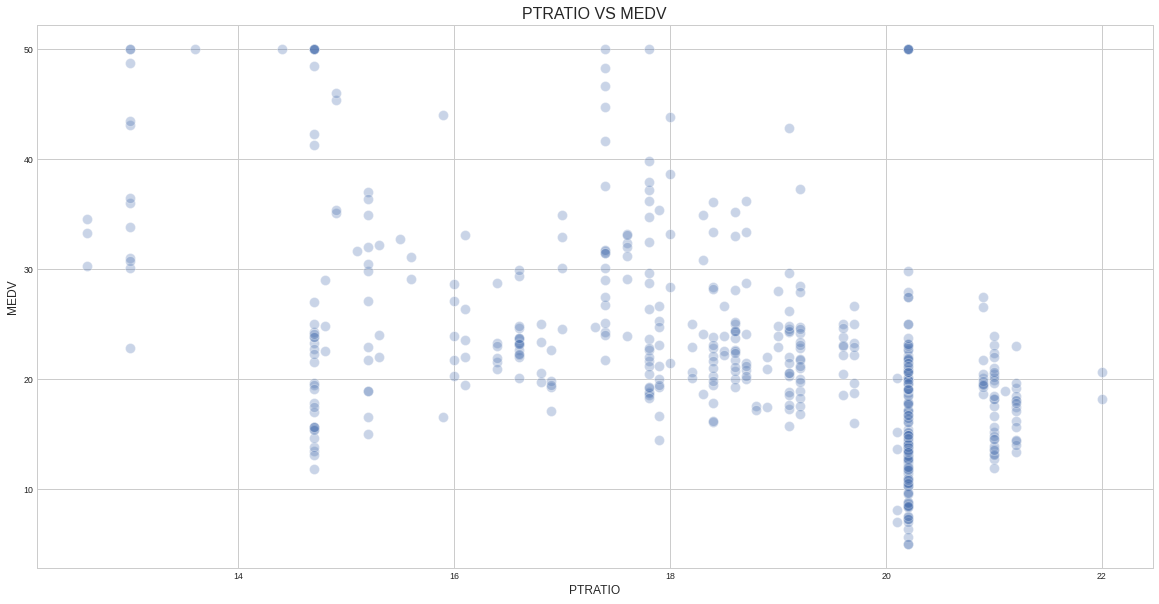

In [32]:
plt.scatter(x = 'PTRATIO', y = 'MEDV',
            data = bos, s =100, alpha = 0.3, edgecolor = 'white')
plt.title('PTRATIO VS MEDV', fontsize =16)
plt.ylabel('MEDV', fontsize =12)
plt.xlabel('PTRATIO', fontsize = 12)
plt.savefig('ptratio_medv.png')

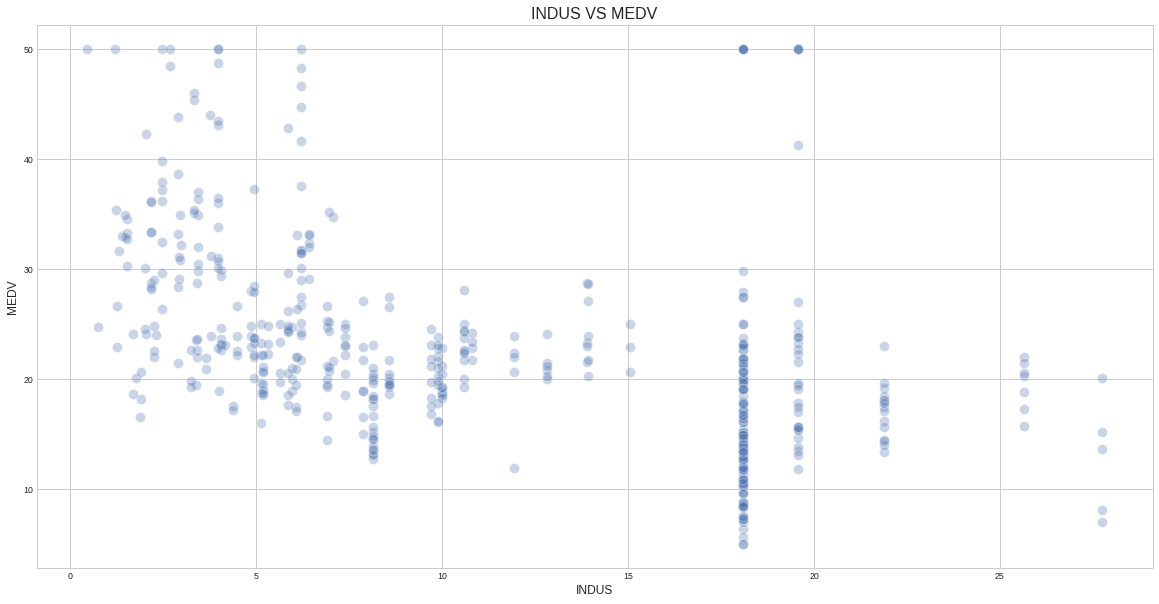

In [33]:
plt.scatter(x = 'INDUS', y = 'MEDV',
            data = bos, s =100, alpha = 0.3, edgecolor = 'white')
plt.title('INDUS VS MEDV', fontsize =16)
plt.ylabel('MEDV', fontsize =12)
plt.xlabel('INDUS', fontsize = 12)
plt.savefig('indus_medv.png')

# Splitting into training and testing datasets (SLR)

In [34]:
X_var = bos[['RM']] # independent variable
y_var = bos['MEDV'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(
            X_var, y_var, test_size = 0.3, random_state = 0)

# Training model(SLR)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

# Checking accuracy (SLR)

In [36]:
print(cl('R-Squared:', attrs=['bold']),
      lr.score(X_test, y_test))

R-Squared: 0.43514364832115193


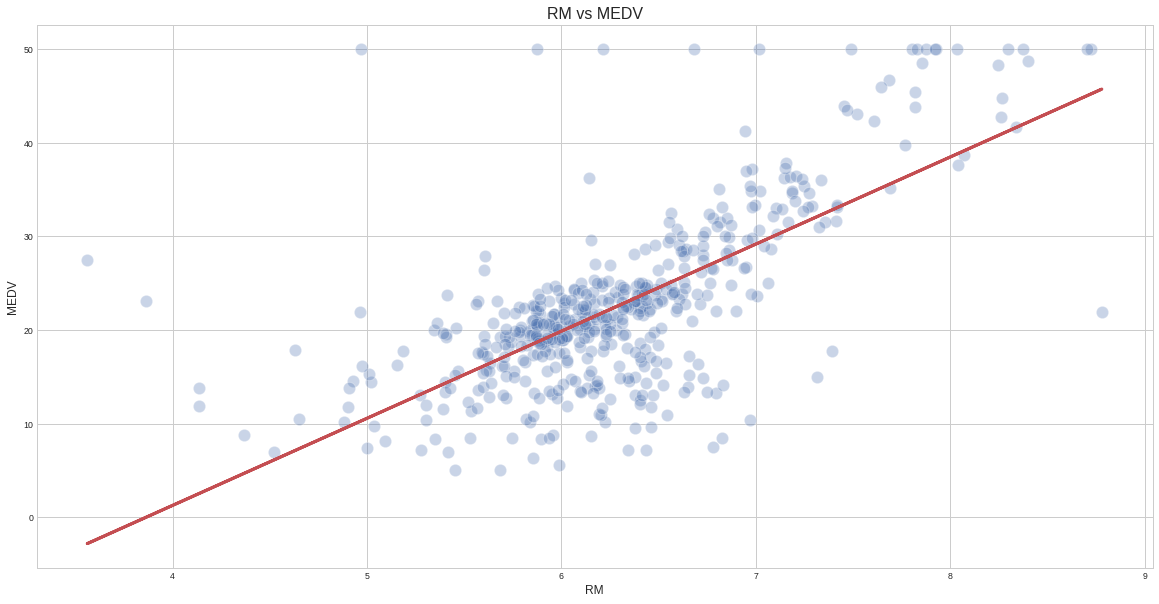

In [38]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'RM', y = 'MEDV',
                        data = bos, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(bos['RM'], slr_slope*bos['RM'] + slr_intercept,
                        color = 'r', linewidth = 3)
plt.title('RM vs MEDV', fontsize = 16)
plt.ylabel('MEDV', fontsize = 12)
plt.xlabel('RM', fontsize = 12)
plt.savefig('RM_MEDV_fit.png')

# Splitting into trainig and testing datasets (MLR)

In [39]:
X1_var = bos[['LSTAT',
                'RM',
                'PTRATIO',
                'INDUS']]

y_var = bos['MEDV'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
                    X1_var,
                    y_var,
                    test_size = 0.3,
                    random_state = 0)

# Training model and checking out accuracy (MLR)

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

# Checking accuracy (MLR)

In [41]:
print(cl('R-Squared :', attrs = ['bold']),
            lr.score(X_test, y_test))


R-Squared : 0.5974946214849728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


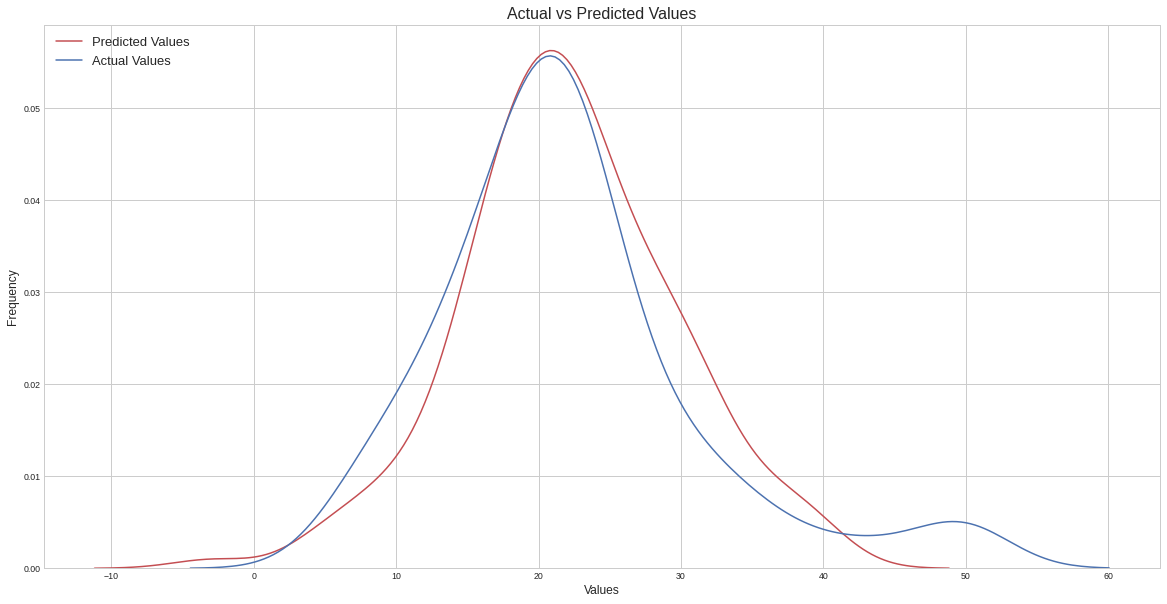

In [42]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('ap.png')